# GRIP : The Sparks Foundation    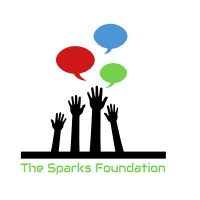

## Task 1 : Prediction using supervised machine learning
### Submitted by : Salma Ferjeni

### In this task, we are going to predict the score of a student based on the number of study hours

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Importing data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#Describing the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


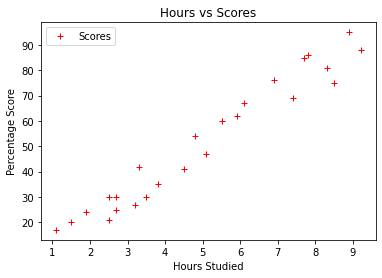

In [11]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='+', color='red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph below, we can notice that there is a linear relation between the number of hours studied and the scores

### Data Preprocessing

In [17]:
#Dividing the dataset into attributes and labels
X = data.iloc[:, :-1].values  #independent variable array
y = data.iloc[:,1].values  #dependent variable vector

In [18]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the dataset into train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

### Fitting the regression model

In [21]:
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

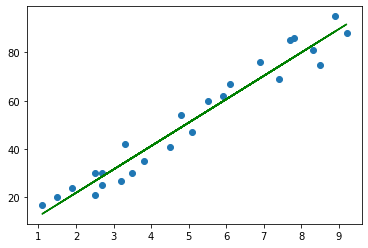

In [22]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='green');
plt.show()

### Predicting the test set results

In [24]:
print(X_test)
y_pred = regressor.predict(X_test) 
y_pred
 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]]


array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

In [25]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


### What would be the score of a student who had studied for 6.5 hours ?

In [33]:
hours = [[6.5]]
another_pred = regressor.predict(hours)
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(another_pred[0]))

Number of Hours = [[6.5]]
Predicted Score = 65.49601524601525


### Model Evaluation

In [34]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.691397441397438
Mean Squared Error: 25.463280738222547
Root Mean Squared Error: 5.046115410711743
